In [71]:
#DATASET : Category: Healthcare and Medicine
#To predict if a person has liver disease or not
#Dataset: field used to split the data into two sets (patient with liver disease, or no disease)

#DATA COLLECTION

import pandas as pd

In [72]:
data= pd.read_csv('indian_liver_patient.csv')

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [74]:
#DATA ANALYSIS

#Using countplot

import seaborn as sb

In [75]:
data.head()

#Dataset is the column to be predicted. 1= Person has liver diesease. 2= Person doesn't have liver disease.

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


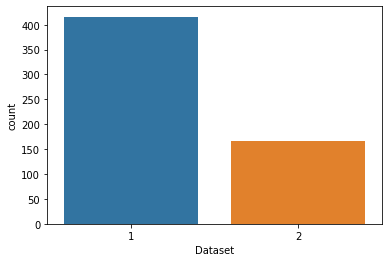

In [76]:
sb.countplot(x='Dataset',data=data)

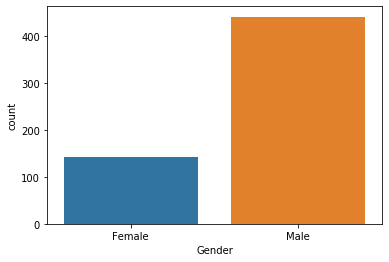

In [77]:
sb.countplot(x='Gender',data=data)

In [78]:
#Check if there are null values in the data

data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B39B4AC648>,
      dtype=object)

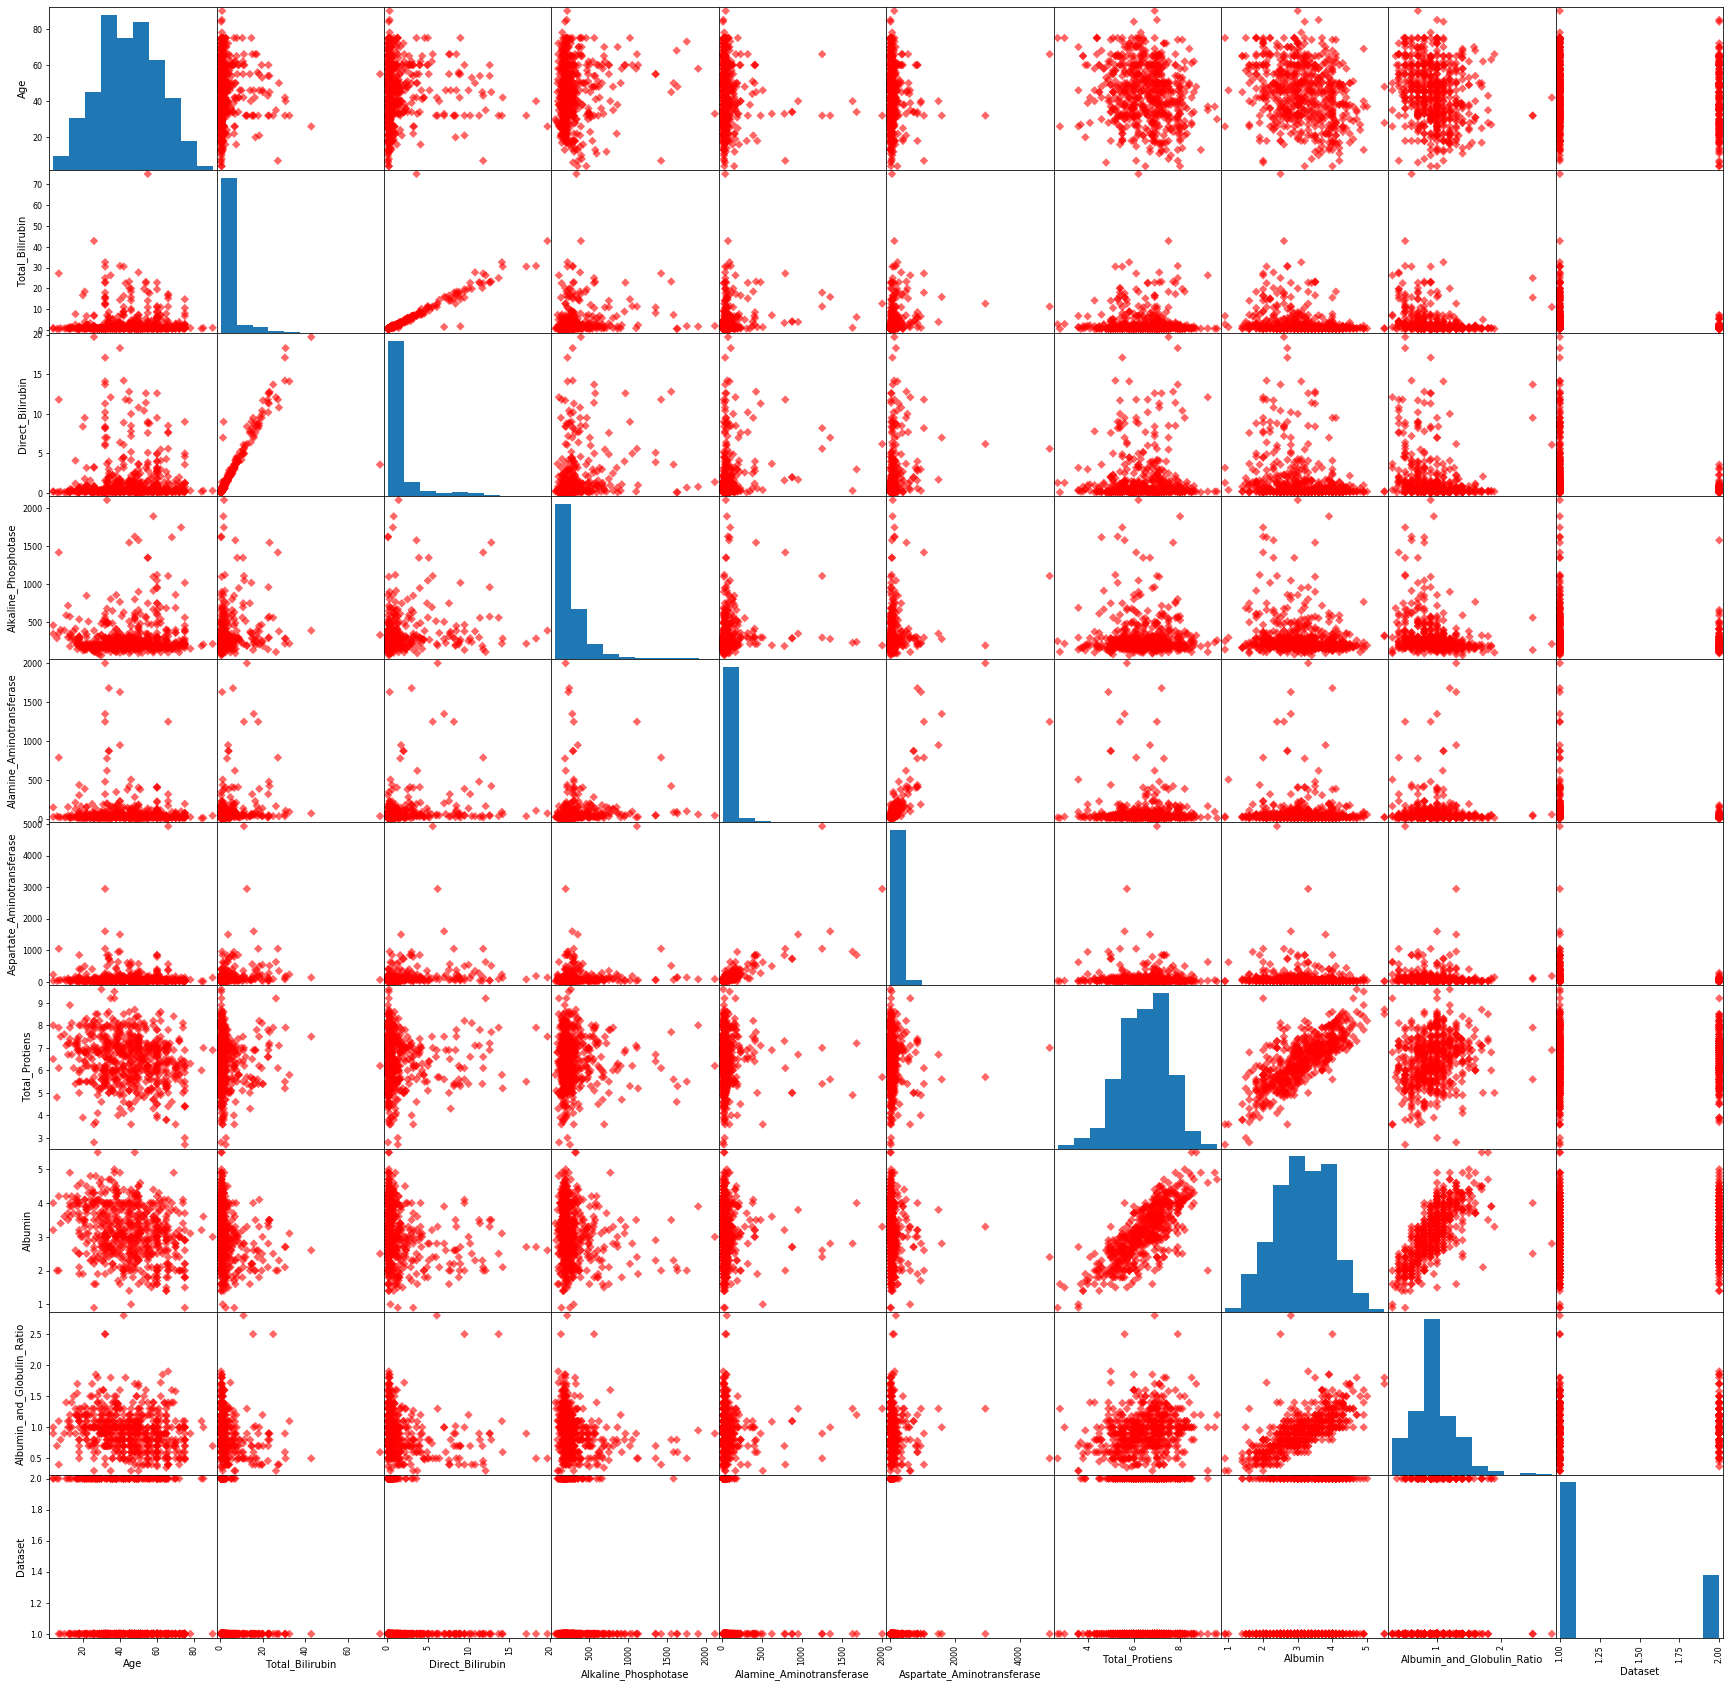

In [79]:
# Analysing using scatter matrix to see feature-feature relation 

pd.plotting.scatter_matrix(data, c='r', alpha=0.6, figsize=(30,30),marker='D')

In [80]:
# Using scatter plot to see relation between Direct Bilirubin and Total Bilirubin

from matplotlib.pyplot import scatter as sm

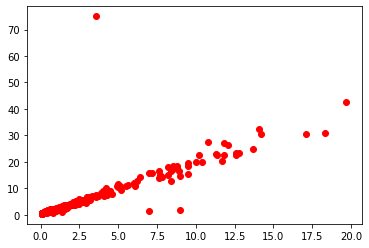

In [81]:
sm(data['Direct_Bilirubin'], data['Total_Bilirubin'], color='r')

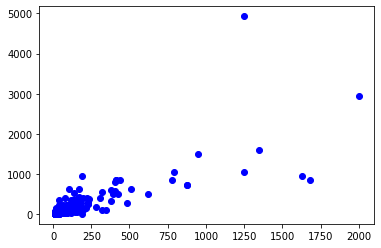

In [82]:
sm(data['Alamine_Aminotransferase'], data['Aspartate_Aminotransferase'], color='b')

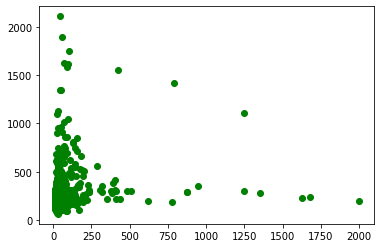

In [83]:
sm(data['Alamine_Aminotransferase'], data['Alkaline_Phosphotase'], color='g')

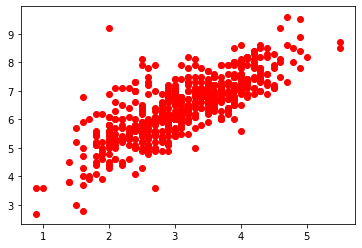

In [84]:
sm(data['Albumin'], data['Total_Protiens'], color='r')

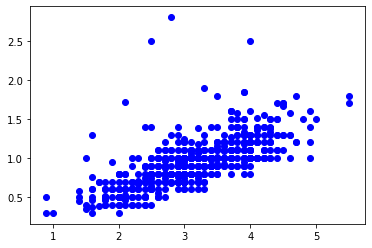

In [85]:
sm(data['Albumin'], data['Albumin_and_Globulin_Ratio'], color='b')

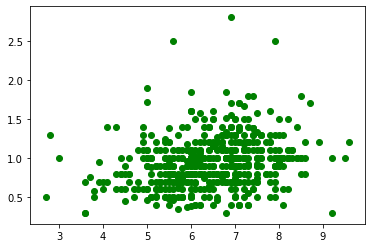

In [86]:
sm(data['Total_Protiens'], data['Albumin_and_Globulin_Ratio'], color='g')

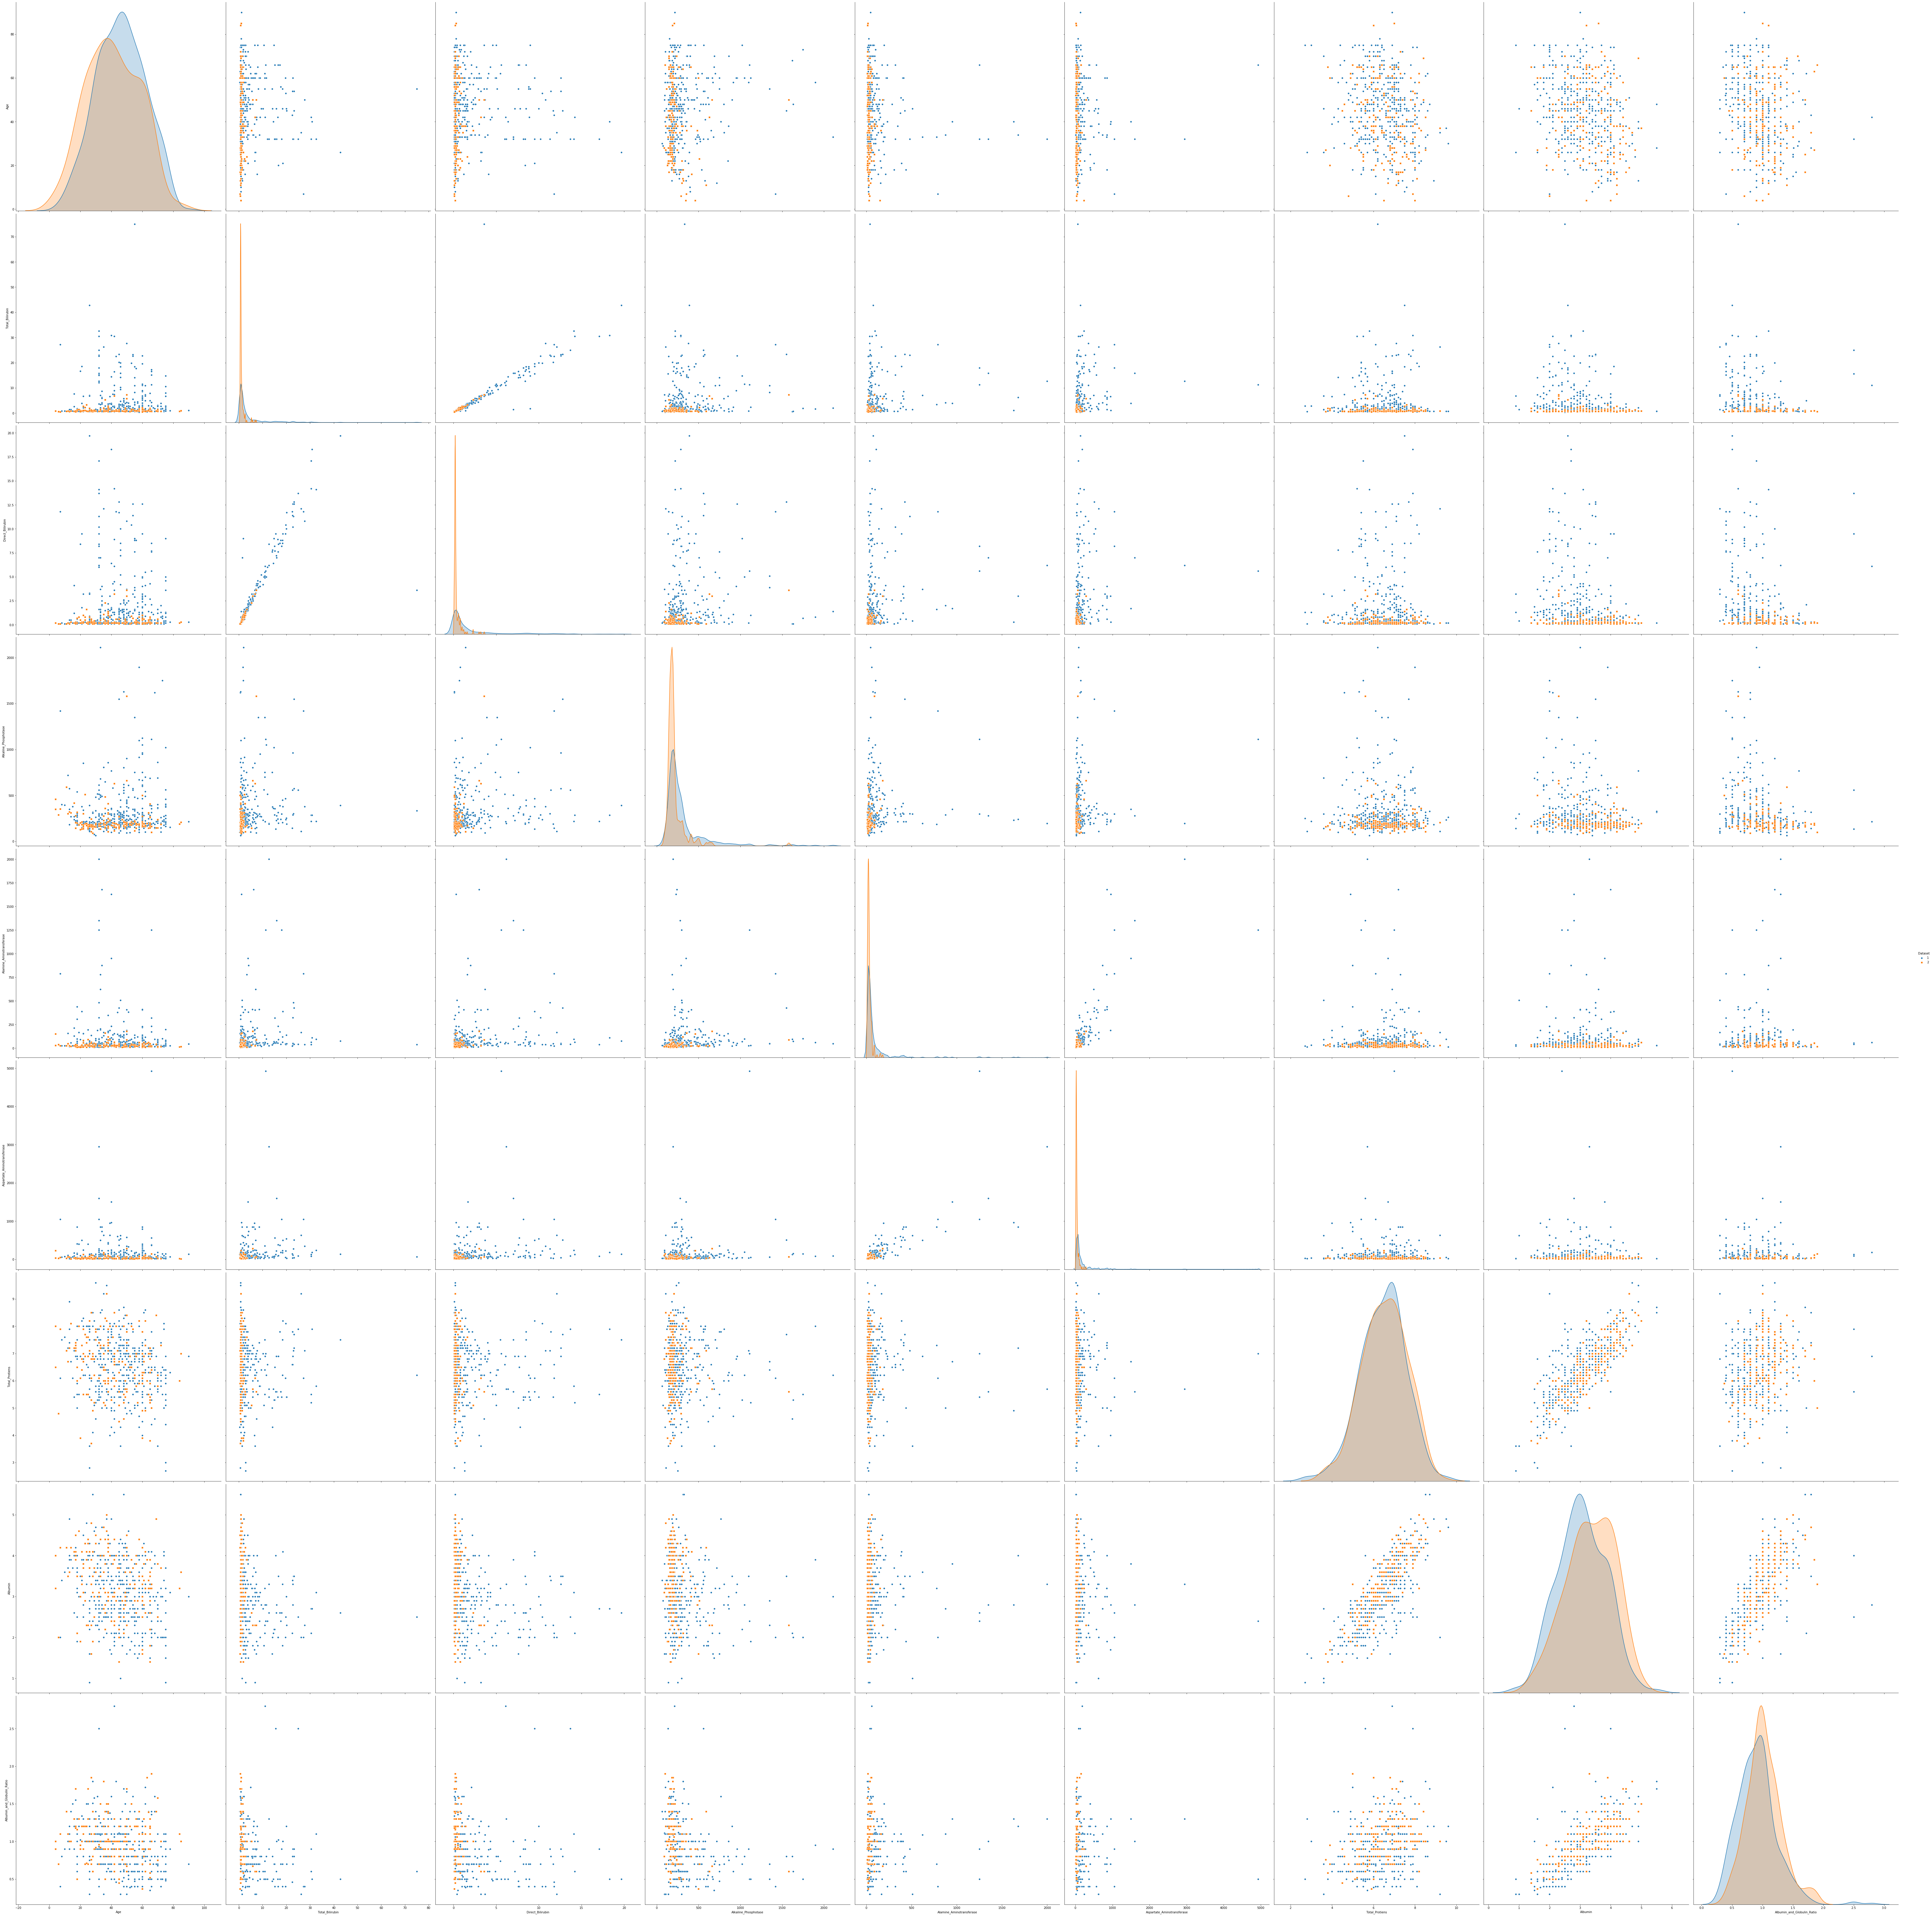

In [87]:
sb.pairplot(data,hue='Dataset',height=10,markers=['o','s'])

In [88]:
#OBSERVATIONS:
# Direction relationships between:
# 1.Direct_Bilirubin & Total_Bilirubin
# 2.Aspartate_Aminotransferase & Alamine_Aminotransferase
# 3.Total_Protiens & Albumin
# 4.Albumin_and_Globulin_Ratio & Albumin


In [89]:
#DATA PROCESSING

#Converting strings in Gender column into integers

pd.get_dummies(data['Gender'], prefix = 'Gender').head()

,Gender_Female,Gender_Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [90]:
data = pd.concat([data,pd.get_dummies(data['Gender'], prefix = 'Gender')], axis=1)

In [99]:
data.head()

#We created two columns with dummy values for Gender hence Gender column can be deleted later.

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


In [100]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449,0.243568,0.756432
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490,0.429603,0.429603
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000,0.000000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000,0.000000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000,0.000000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000,0.000000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000,1.000000,1.000000


In [101]:
# We had seen earlier that Albumin_and_Globulin_Ratio column had 4 NaN values. 


data[data['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1,1,0
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1,0,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2,1,0
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2,0,1


In [102]:
#Fills them with the mean of rest of the values in Albumin_and_Globulin_Ratio

data["Albumin_and_Globulin_Ratio"] = data.Albumin_and_Globulin_Ratio.fillna(data['Albumin_and_Globulin_Ratio'].mean())

In [104]:
#Creating arrays. y contains data to be predicted (dependent data).

x=data.drop(['Gender','Dataset'], axis=1)
y=data['Dataset'] 

In [105]:
x.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0,1


In [106]:
y

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Dataset, Length: 583, dtype: int64

In [108]:
#Splitting the dataset into test vs train

from sklearn.model_selection import train_test_split as tts

In [147]:
x_train,x_test,y_train,y_test= tts(x,y,test_size=0.2,random_state=90)

In [148]:
#ALGORITHM SELECTION

#Problem type is classification. Algorithm chosen: LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

In [149]:
logreg=LogisticRegression()

In [150]:
logreg.fit(x_train,y_train)

C:\Users\Liya Nafia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [151]:
logacc=logreg.score(x_test,y_test)

In [152]:
logacc

0.7521367521367521

In [153]:
logpred=logreg.predict(x_test)

In [154]:
from sklearn.metrics import confusion_matrix
conmat= confusion_matrix(y_test,logpred)

In [155]:
conmat

array([[76,  8],
       [21, 12]], dtype=int64)

In [156]:
# ALGORITHM 2: KNN 

from sklearn.neighbors import KNeighborsClassifier 

In [157]:
knn=KNeighborsClassifier(n_neighbors=80)

In [158]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=80, p=2,
                     weights='uniform')

In [159]:
knnacc= knn.score(x_test,y_test)

In [160]:
knnacc

0.7521367521367521

In [162]:
knnpred=knn.predict(x_test)

In [163]:
con_mat= confusion_matrix(y_test,knnpred)

In [164]:
con_mat

array([[84,  0],
       [29,  4]], dtype=int64)